## Student Performance Indicator
#### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
## 1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INEURONE PROJECTS\mlprojects\notebook\stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# shape of the data

df.shape

(1000, 8)

## 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score
## 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of data set

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Insight

* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "Total Score" and "Average"

In [11]:
#creating a total score
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# creating average score
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

## 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

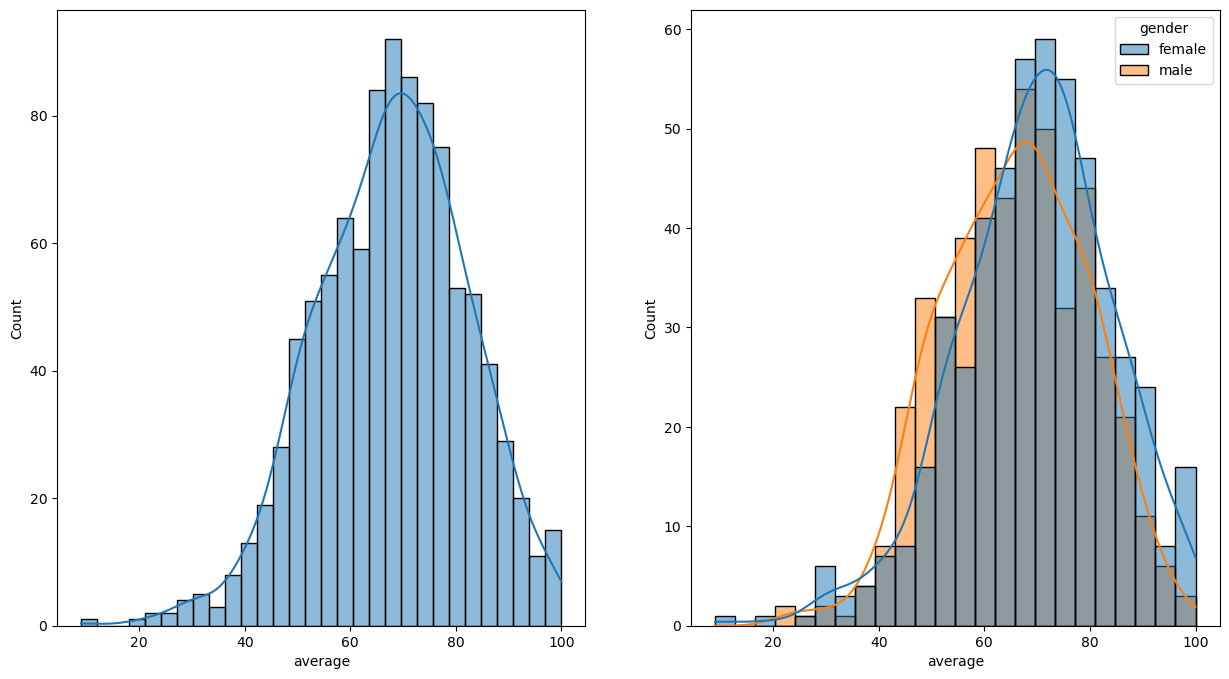

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,8))

plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'average', hue='gender', kde = True)
plt.show()

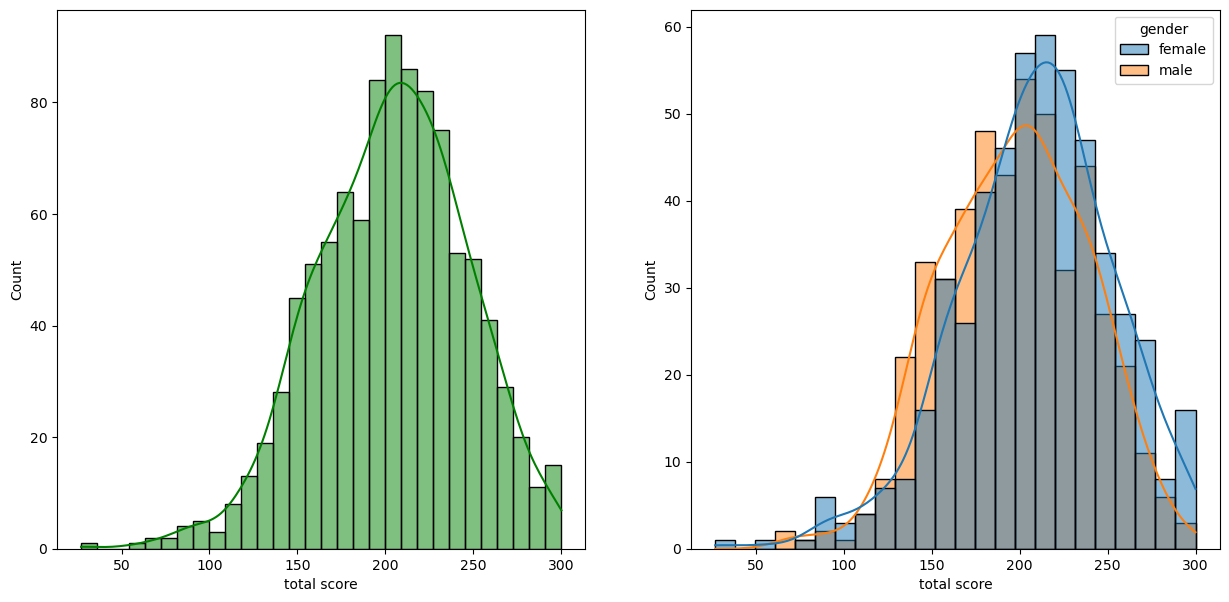

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()


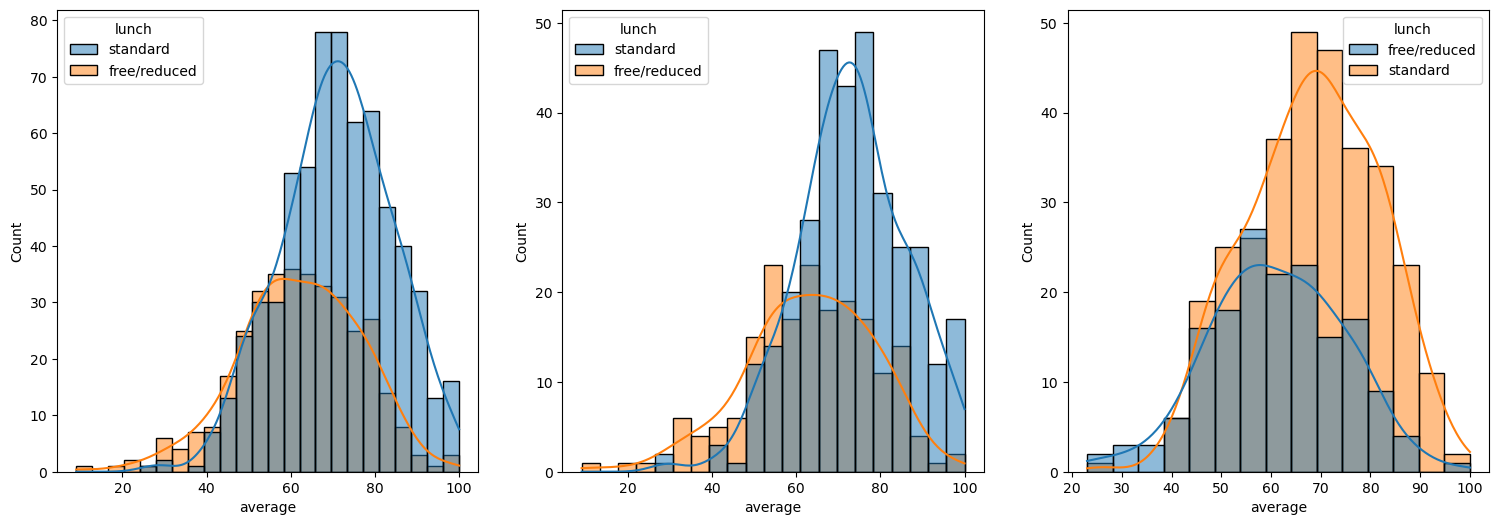

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

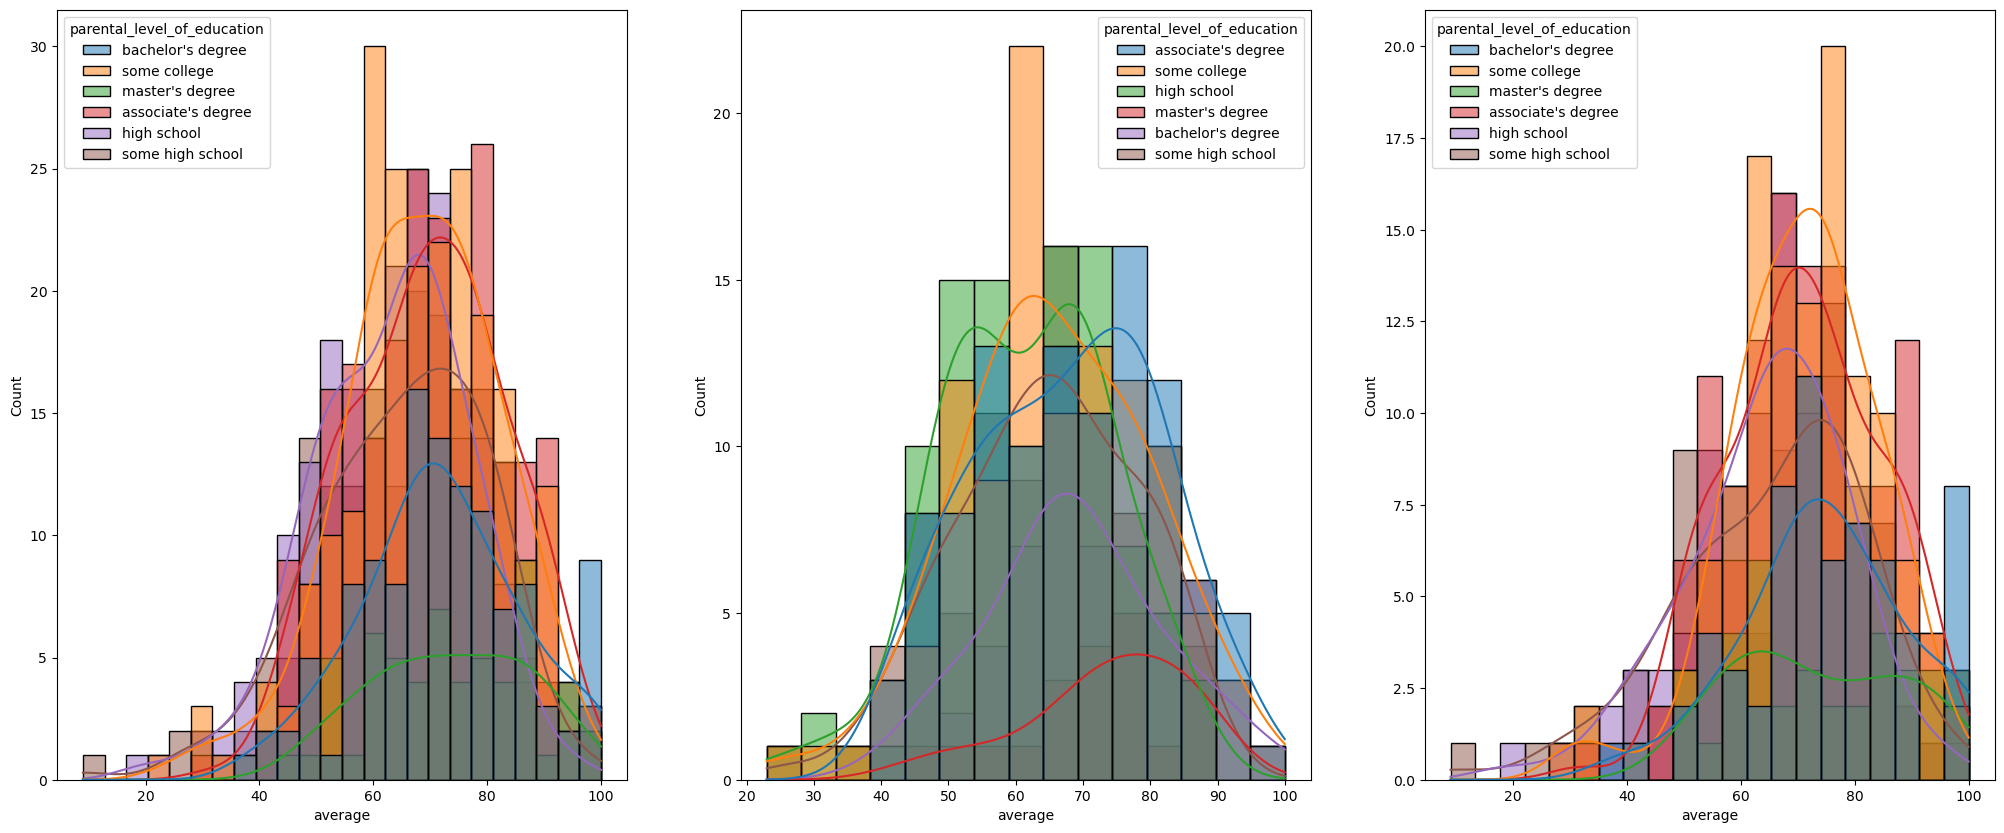

In [17]:
plt.subplots(1,3, figsize = (25,10))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = "parental_level_of_education")
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'],x ='average', kde = True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data= df[df.gender == 'female'], x = 'average', kde = True, hue= 'parental_level_of_education')
plt.show()


#### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

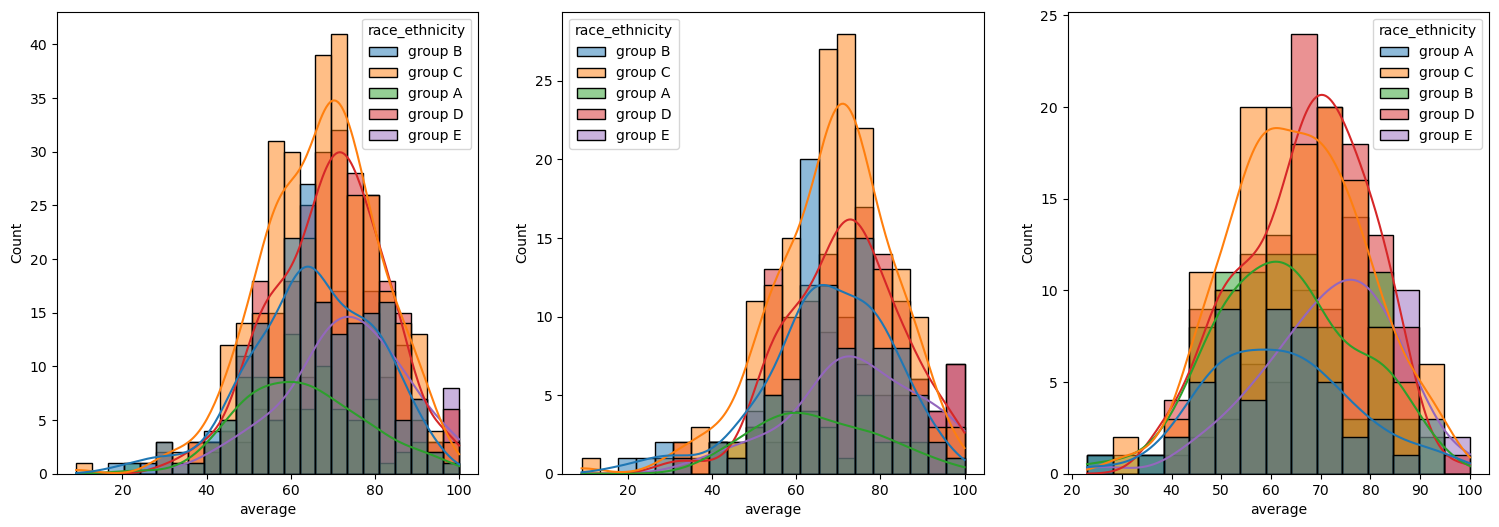

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()


#### Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Multivariate analysis using

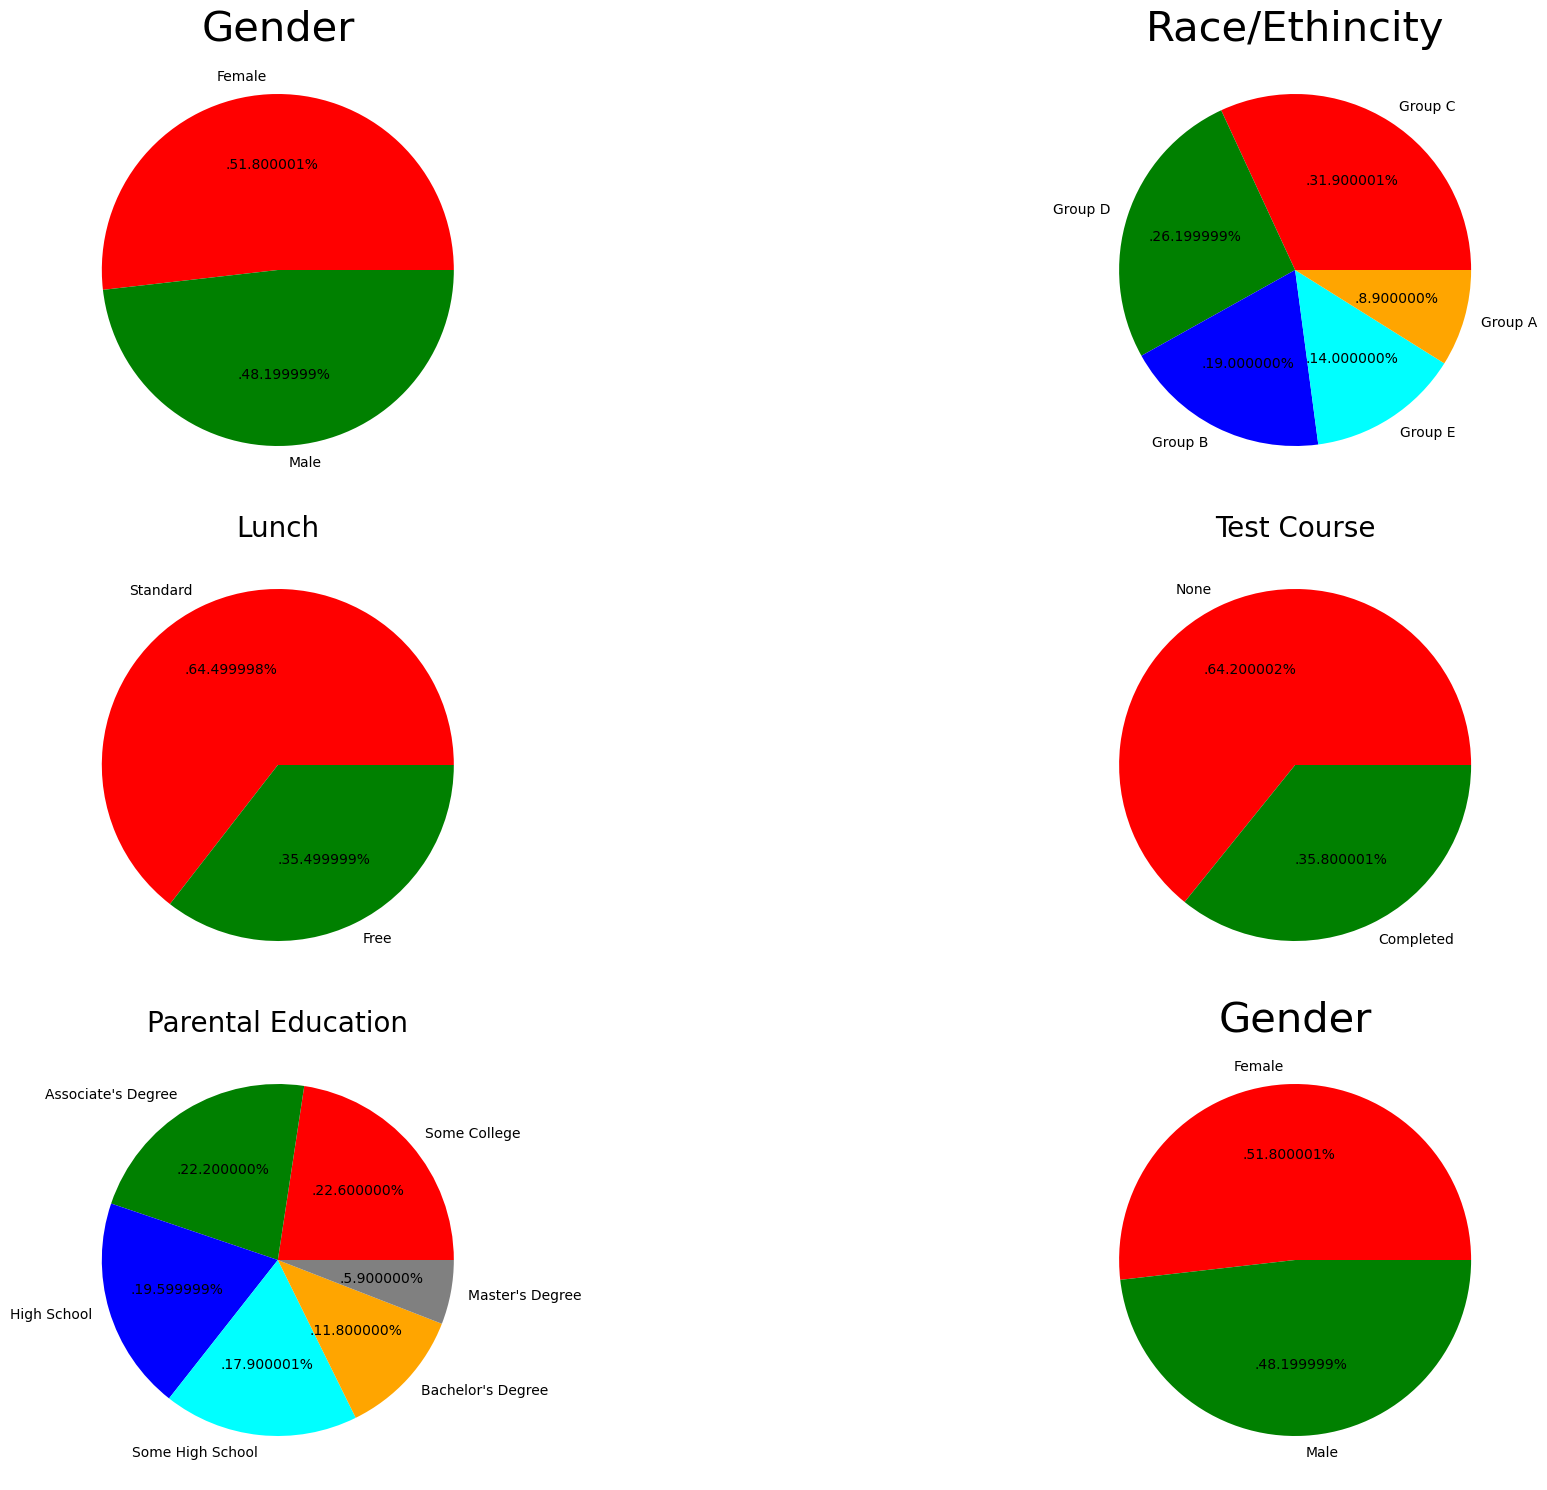

In [20]:
fig, ax = plt.subplots(3,2, figsize = (25,15))


size = df['gender'].value_counts()
labels = ['Female','Male']
color = ['red', 'green']

ax[0,0].pie(size,colors=color, labels=labels, autopct='.%2f%%')
ax[0,0].set_title('Gender', fontsize = 30)
ax[0,0].axis('off')



size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

ax[0,1].pie(size,colors=color, labels=labels, autopct='.%2f%%')
ax[0,1].set_title('Race/Ethincity', fontsize = 30)
ax[0,1].axis('off')

size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

ax[1,0].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
ax[1,0].set_title('Lunch', fontsize = 20)
ax[1,0].axis('off')

size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

ax[1,1].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
ax[1,1].set_title('Test Course', fontsize = 20)
ax[1,1].axis('off')

size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

ax[2,0].pie(size, colors = color,labels = labels,autopct = '.%2f%%')
ax[2,0].set_title('Parental Education', fontsize = 20)
ax[2,0].axis('off')

size = df['gender'].value_counts()
labels = ['Female','Male']
color = ['red', 'green']

ax[2,1].pie(size,colors=color, labels=labels, autopct='.%2f%%')
ax[2,1].set_title('Gender', fontsize = 30)
ax[2,1].axis('off')


plt.tight_layout()
plt.grid()

plt.show()


## Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature Wise Visualization
#### GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

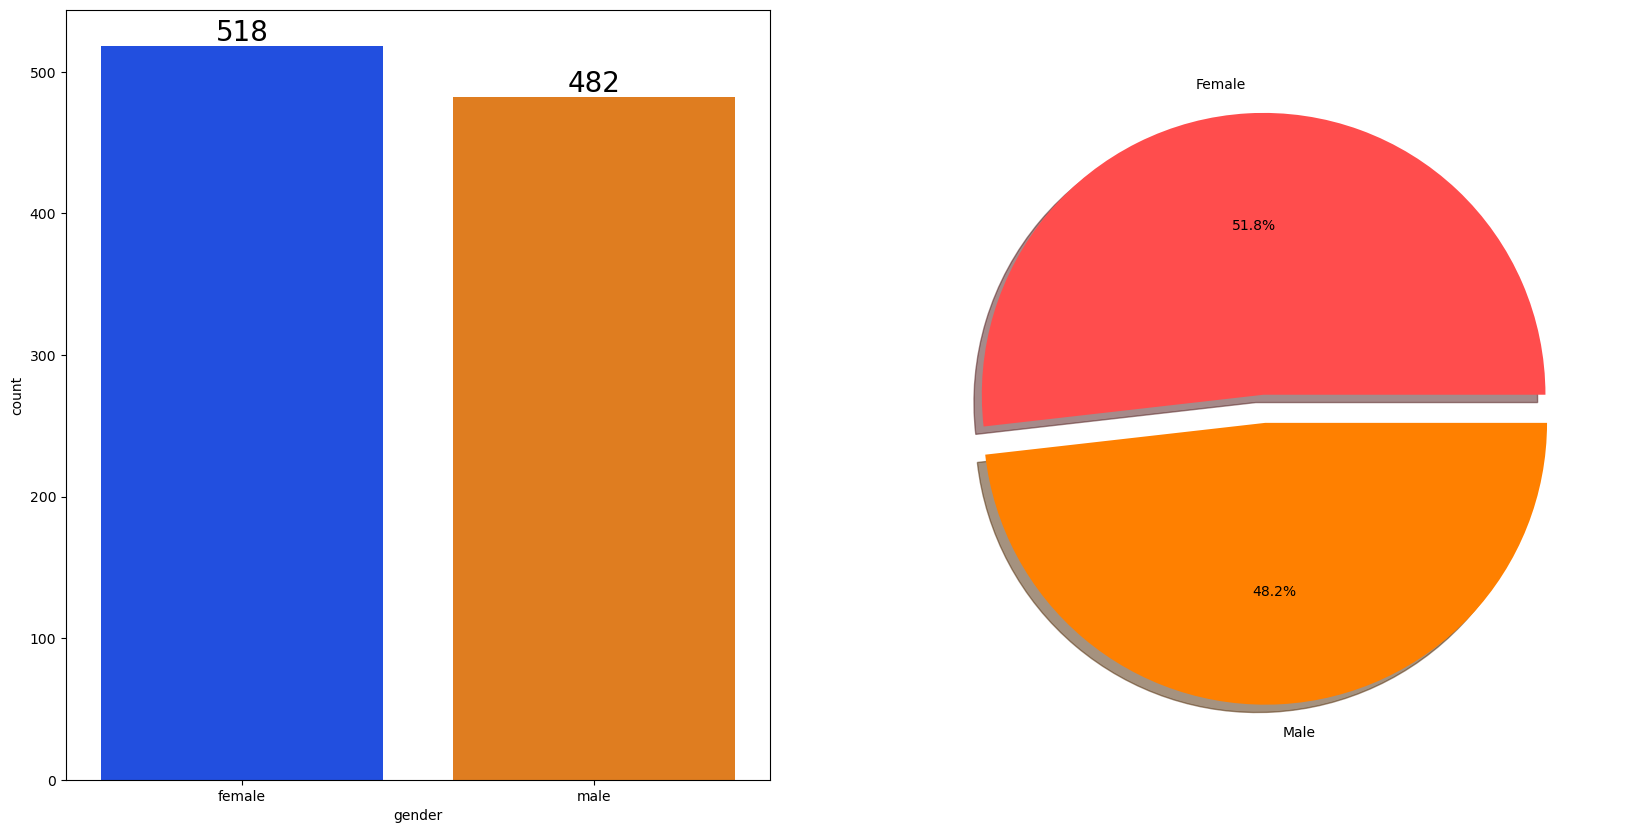

In [21]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
* Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

In [24]:
new_data_group = df[['gender','math_score', 'reading_score',
       'writing_score', 'total score', 'average']]
gender_group = new_data_group.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


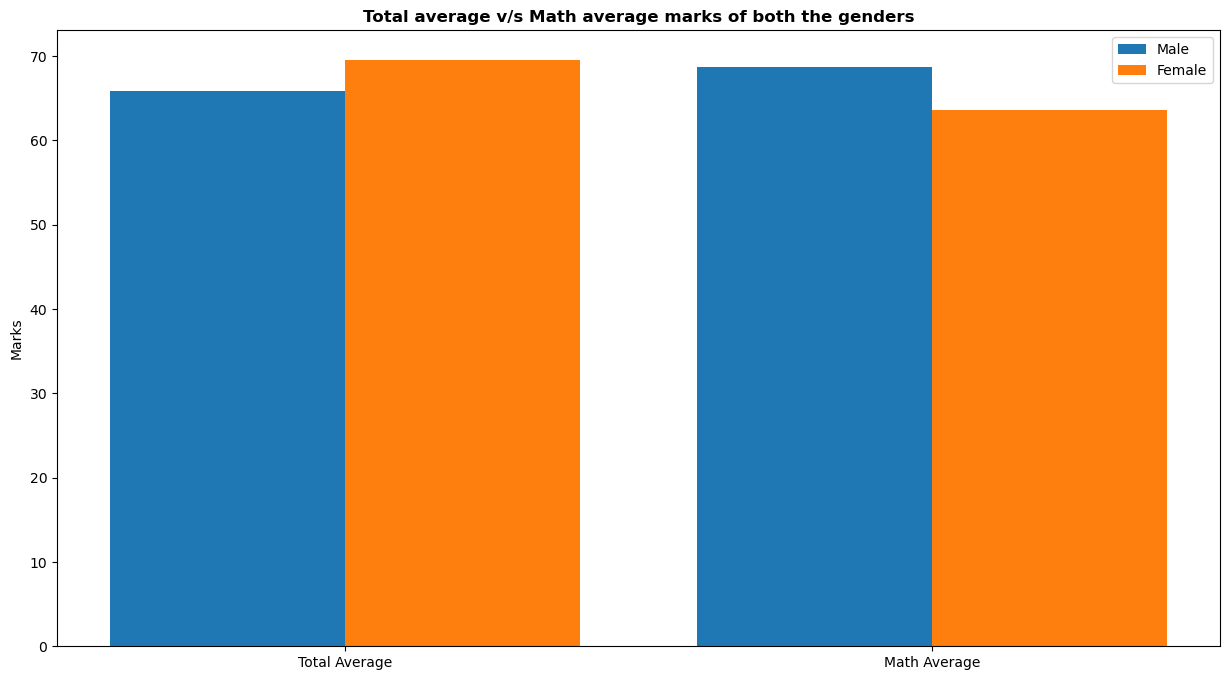

In [25]:
plt.figure(figsize=(15,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_score = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

"""
These lines plot two sets of bar charts. The plt.bar function takes the following arguments:

The X-axis positions for the bars.
The heights of the bars (scores).
The width of the bars (0.4).
The label for the bars (used in the legend).
The first bar chart is shifted to the left by 0.2 units (X_axis - 0.2) 
to avoid overlap with the second bar chart, which is shifted to the right by 0.2 units (X_axis + 0.2).

"""
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()



#### Insights
1. 
On an average females have a better overall score than men
2. 
whereas males have scored higher in Maths.

## RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?
#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

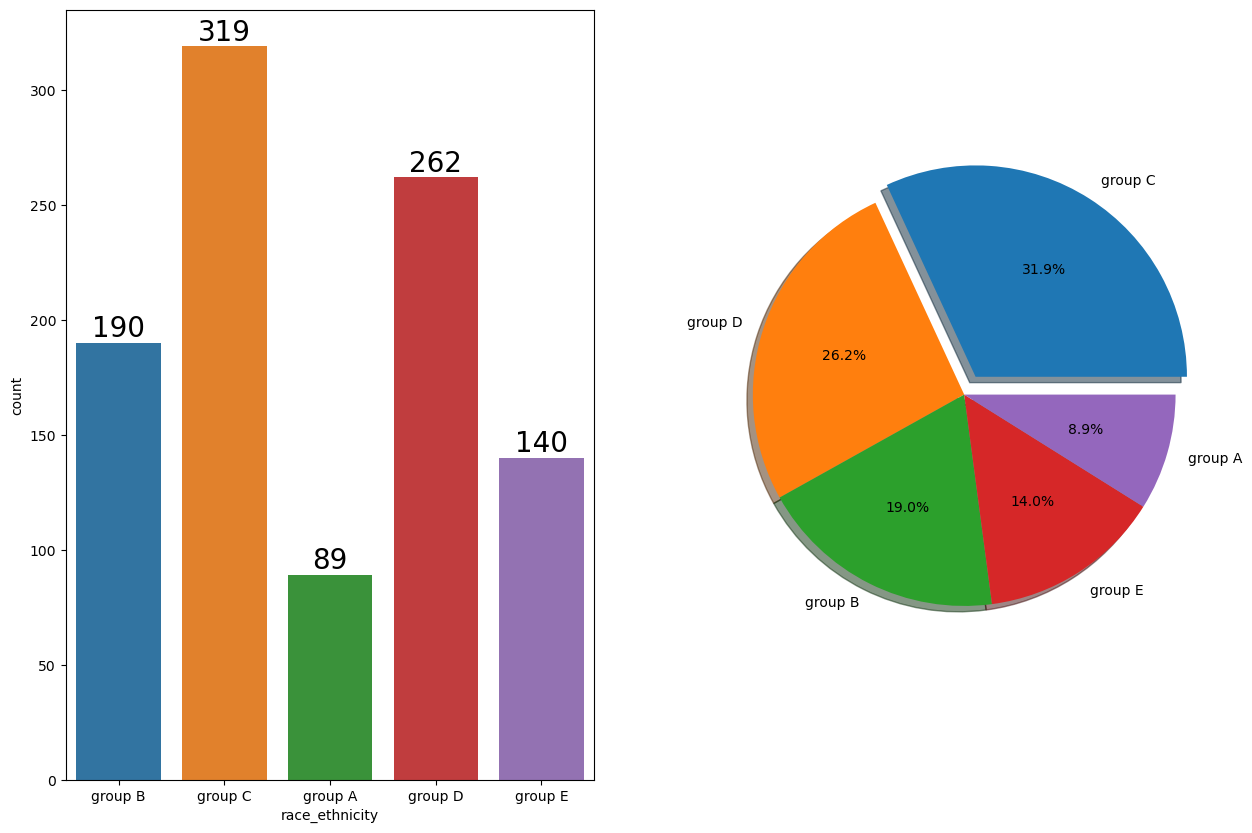

In [39]:
fig, ax = plt.subplots(1,2, figsize = (15,10))

sns.countplot(x =df['race_ethnicity'], data=df, ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
"""
This loop iterates over each container in the first subplot (ax[0]).
In the context of a bar plot, a container holds all the bars (rectangles) of the plot.
ax[0].bar_label(container, color='black', size=20)
This method adds labels to each bar in the container.
color='black' sets the color of the labels to black.
size=20 sets the font size of the labels.
"""
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].value_counts().index
plt.pie(size, labels=labels,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

## CHECKING OUTLIERS

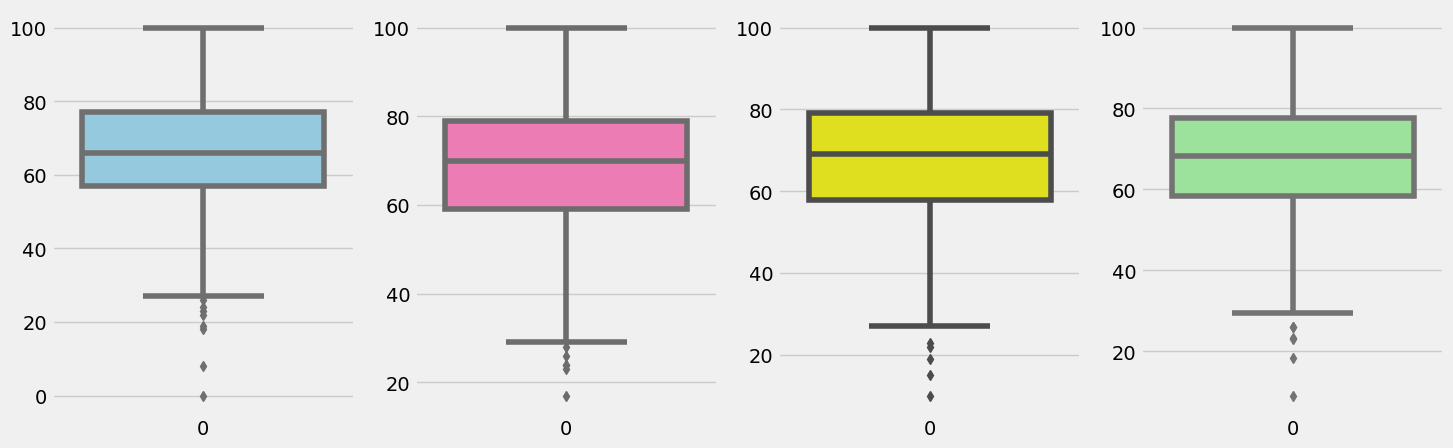

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## MUTIVARIATE ANALYSIS USING PAIRPLOT

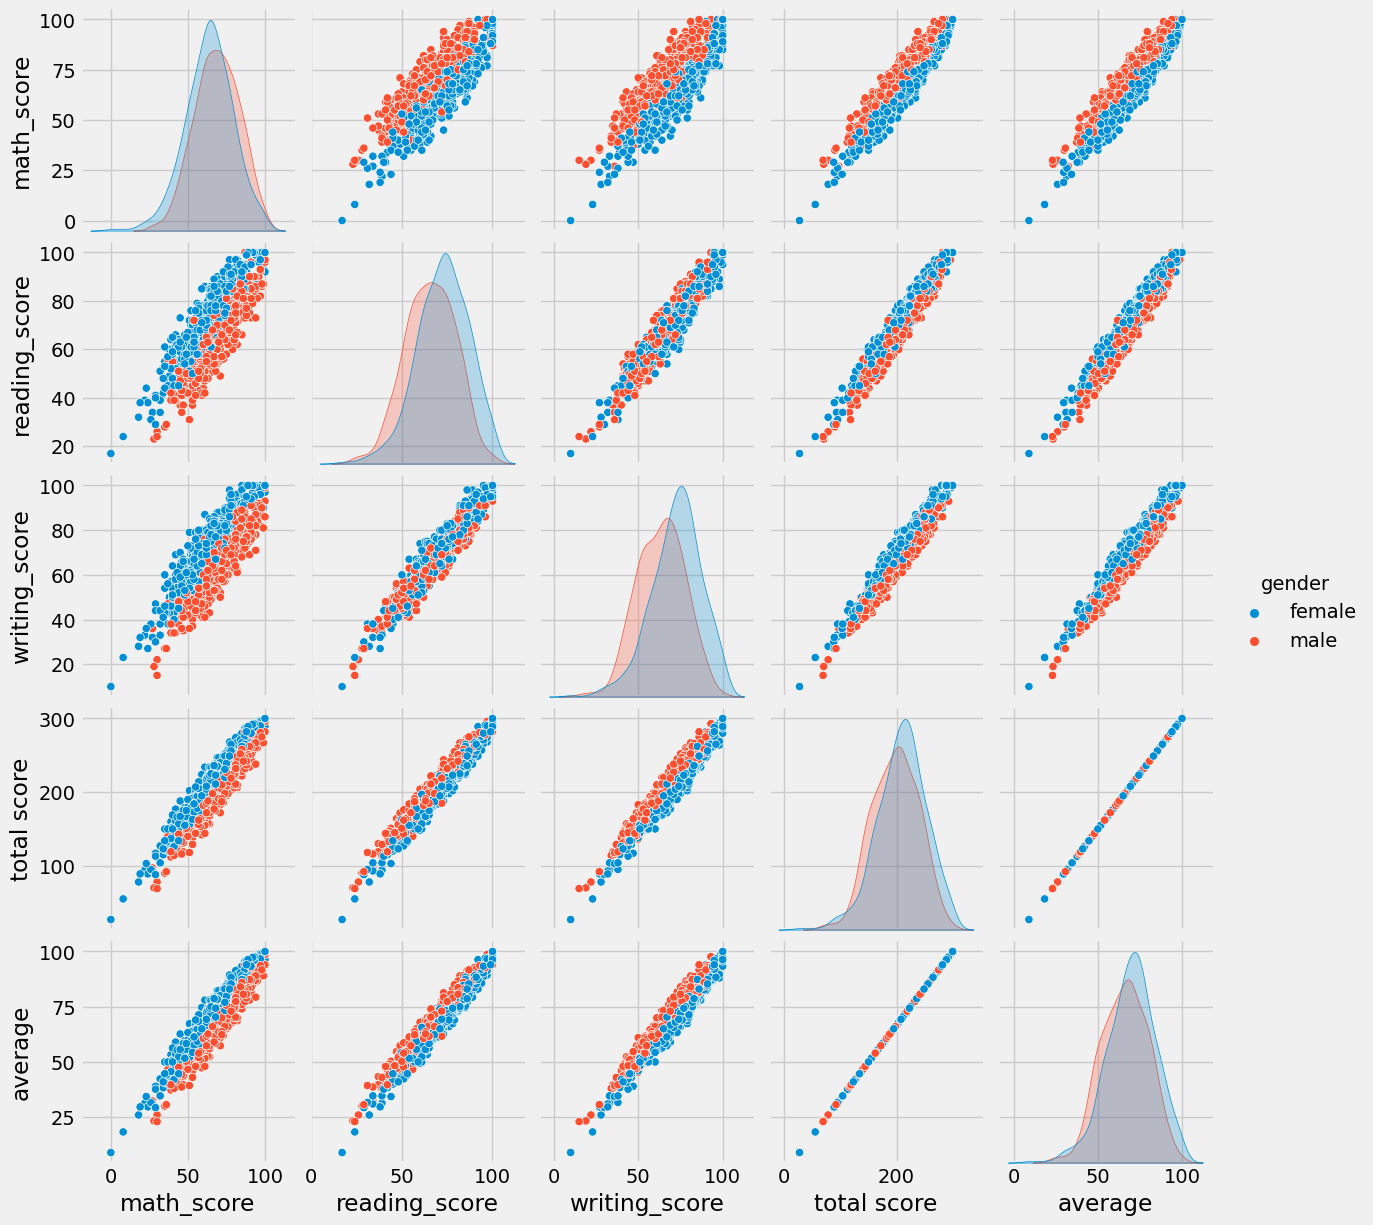

In [55]:
sns.pairplot(df, hue='gender')
plt.show()

## Insights
* From the above plot it is clear that all the scores increase linearly with each other.